In [257]:
%cd /home/plent/Documenten/Gitlab/NeuralODEs/jax_neural_odes

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from adjustText import adjust_text

/home/plent/Documenten/Gitlab/NeuralODEs/jax_neural_odes


In [258]:
#model information
n_parameter={"Borghans_BiophysChem1997":24,
                  "Palani2011":15,
                  "Sneyd_PNAS2002":16,
                  "Kinetic_glycolysis_assay_model":13,
                  "Fujita_SciSignal2010":26,
                  "Messiha2013":192,
                  "Raia_CancerResearch":45,
                  "Weber_BMC2015":53,
                  "Crauste_CellSystems2017":16,
                  "Fiedler_BMC2016":24,
                  "Smallbone2013_SerineBiosynthesis":10,
                  "Bruno_JExpBio2016":10,
                  "Becker_Science2010":17,
                  "Ray2013":20,
                  "Chassagnole2002":117,
                  "Bertozzi2020":36,
                  "Schwen_PONE2014":19,
                  "Garde2020":6,
                  "Smallbone2011_TrehaloseBiosynthesis":52,
                  "Elowitz_Nature2000":22}

n_state_variables={"Borghans_BiophysChem1997":3,
                  "Palani2011":5,
                  "Sneyd_PNAS2002":6,
                  "Kinetic_glycolysis_assay_model":12,
                  "Fujita_SciSignal2010":26,
                  "Messiha2013":28,
                  "Raia_CancerResearch":14,
                  "Weber_BMC2015":7,
                  "Crauste_CellSystems2017":5,
                  "Fiedler_BMC2016":6,
                  "Smallbone2013_SerineBiosynthesis":2,
                  "Bruno_JExpBio2016":6,
                  "Becker_Science2010":6,
                  "Ray2013":6,
                  "Chassagnole2002":36,
                  "Bertozzi2020":3,
                  "Schwen_PONE2014":11,
                  "Garde2020":6,
                  "Smallbone2011_TrehaloseBiosynthesis":6,
                  "Elowitz_Nature2000":8}

In [259]:

def retrieve_convergence_results(file_list):
    # file_list

    loss_dfs={}
    params_dfs={}
    norms_dfs={}
    for file in file_list:
        if "losses" in file:
            loss_data=pd.read_csv(results_dir+file,index_col=0)
            loss_dfs[file]=loss_data
        if "parameters" in file:
            params_data=pd.read_csv(results_dir+file,index_col=0)
            params_dfs[file]=params_data
        if "norms" in file:
            norms_data=pd.read_csv(results_dir+file,index_col=0)
            norms_dfs[file]=norms_data
    return loss_dfs,params_dfs,norms_dfs




#### Q1.1. What is the succesfull initialization rate per model
We perform latin hypercube sampling between 1/100 and 100 of the true value. We would expect that not all parameter sets are feasible. Here, we quantify this.

1. Compare against number of parameters

2. Compare against number of state variables 
3. Compare against initial norm

In [260]:
## retrieve all loss files
model_names=os.listdir("results")
init_success_rate={}
for model_name in model_names:
    results_dir="results/"+model_name+"/"
    file_list=os.listdir(results_dir)
    loss_dfs,params_dfs,norms_dfs=retrieve_convergence_results(file_list)
    success_rate={}
    for i,key in enumerate(loss_dfs.keys()):
        loss_df=loss_dfs[key]

        percentage_succeeded_initializations=len(np.where(loss_df.iloc[0,:]!=-1)[0])/np.shape(loss_df)[1]*100
        run="run_"+str(i)
        success_rate[run]=percentage_succeeded_initializations

    init_success_rate[model_name]=success_rate

init_success_rate=pd.DataFrame(init_success_rate).T
init_success_rate['n_parameters']=n_parameter
init_success_rate['n_state_variables']=n_state_variables
init_success_rate=init_success_rate.sort_values(by="n_parameters")
init_success_rate['sv_par']=init_success_rate['n_state_variables']/init_success_rate['n_parameters']
# init_success_rate['n_parameters']=[24,15,16,13,192,45,53,16,24,17,20,117,36,19,6,52]
# init_success_rate
init_success_rate.to_csv("analysis/2407_lhs_initialization_succes_rate.csv")




<>:32: SyntaxWarning: invalid escape sequence '\,'
<>:40: SyntaxWarning: invalid escape sequence '\,'
<>:32: SyntaxWarning: invalid escape sequence '\,'
<>:40: SyntaxWarning: invalid escape sequence '\,'
/tmp/ipykernel_14840/1234205857.py:32: SyntaxWarning: invalid escape sequence '\,'
  axes[1].set_xlabel("$log(N_{state\,\,variables})$")
/tmp/ipykernel_14840/1234205857.py:40: SyntaxWarning: invalid escape sequence '\,'
  axes[2].set_xlabel("$\\frac{N_{state\,\,variables}}{N_{parameters}}$",fontsize=13)
/tmp/ipykernel_14840/1234205857.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', len(names))


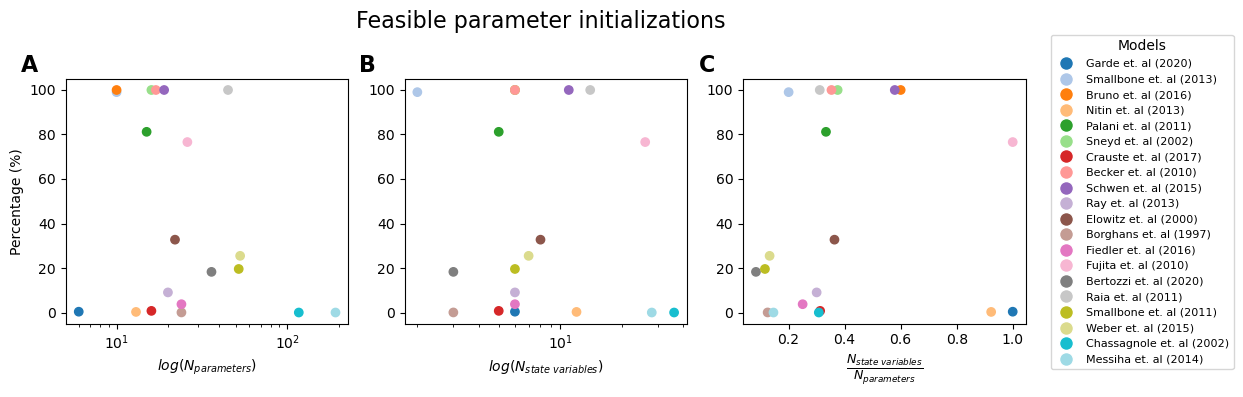

In [210]:
# Create a colormap
names=['Garde et. al (2020)','Smallbone et. al (2013)','Bruno et. al (2016)','Nitin et. al (2013)','Palani et. al (2011)',
       'Sneyd et. al (2002)','Crauste et. al (2017)','Becker et. al (2010)','Schwen et. al (2015)',
       'Ray et. al (2013)','Elowitz et. al (2000)','Borghans et. al (1997)','Fiedler et. al (2016)',
       'Fujita et. al (2010)','Bertozzi et. al (2020)','Raia et. al (2011)','Smallbone et. al (2011)',
       'Weber et. al (2015)','Chassagnole et. al (2002)','Messiha et. al (2014)']



cmap = cm.get_cmap('tab20', len(names))
colors = cmap(range(len(names)))

# Create a figure with 3 subplots arranged in 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(14, 4))





# Plot the first scatter plot
sc1 = axes[0].scatter(init_success_rate['n_parameters'], init_success_rate[['run_0','run_1','run_2']].mean(axis=1), 
                      color=colors)
axes[0].set_xlabel("$log(N_{parameters})$")
axes[0].set_ylabel("Percentage (%)")
axes[0].text(-0.1, 1.1, 'A', transform=axes[0].transAxes, 
             fontsize=16, fontweight='bold', va='top', ha='right')
axes[0].set_xscale("log")

# Plot the second scatter plot
sc2 = axes[1].scatter(init_success_rate['n_state_variables'], init_success_rate[['run_0','run_1','run_2']].mean(axis=1), 
                      color=colors)
axes[1].set_xlabel("$log(N_{state\,\,variables})$")
axes[1].text(-0.1, 1.1, 'B', transform=axes[1].transAxes, 
             fontsize=16, fontweight='bold', va='top', ha='right')
axes[1].set_xscale("log")

# Plot the third scatter plot
sc3 = axes[2].scatter(init_success_rate['sv_par'], init_success_rate[['run_0','run_1','run_2']].mean(axis=1), 
                      color=colors)
axes[2].set_xlabel("$\\frac{N_{state\,\,variables}}{N_{parameters}}$",fontsize=13)
axes[2].text(-0.1, 1.1, 'C', transform=axes[2].transAxes, 
             fontsize=16, fontweight='bold', va='top', ha='right')

# Set a common title for all subplots
fig.suptitle("Feasible parameter initializations", fontsize=16,x=0.39)

# Adjust layout to move plots closer to each other
plt.subplots_adjust(wspace=0.3,right=0.75,top=0.2)  # Decrease the value of wspace to move plots closer

# Adjust layout to prevent overlap and move title closer to plots
plt.tight_layout(rect=[0, 0, 0.75, 0.95])  # Adjust the right side of the subplots to make room for the legend

# Create custom legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=names[i],
                              markerfacecolor=colors[i], markersize=10) for i in range(len(names))]
fig.legend(handles=legend_elements, title="Models", bbox_to_anchor=(0.75, 0.5), loc='center left', fontsize=8, title_fontsize='10')

# Show the combined plot
plt.show()
fig.savefig("figures/2607_initialization_success_rate.svg",bbox_inches="tight")
fig.savefig("figures/2607_initialization_success_rate.png",bbox_inches="tight")

### Q1.2 When a parameter set is succesfull, what is the percentage of succesfull convergence?

In [392]:

threshold=0.01



succesful_convergence={}
model_names=os.listdir("results")
for model_name in model_names:
    results_dir="results/"+model_name+"/"
    file_list=os.listdir(results_dir)
    loss_dfs,params_dfs,norms_dfs=retrieve_convergence_results(file_list)
    success_rate={}
    for i,key in enumerate(loss_dfs.keys()):
        run="converged_run_"+str(i)
        succesful_final=[]
        succesful_inits=[]
        training_init=loss_dfs[key]
        for name in list(training_init.columns):

            loss_final=training_init[name].to_list()[-1]
            loss_first=training_init[name].to_list()[0]
            if loss_final<threshold and loss_final!=-1:
                succesful_final.append(loss_final)
                succesful_inits.append(loss_first)

        x_improvement=np.array(succesful_inits)/np.array(succesful_final)
        percentage_converged=(len(x_improvement)/1000)*100
        success_rate[run]=percentage_converged

    succesful_convergence[model_name]=success_rate


succesful_convergence=pd.DataFrame(succesful_convergence).T
pd.concat([init_success_rate,succesful_convergence],axis=1)

/tmp/ipykernel_14840/2687231937.py:25: RuntimeWarning: invalid value encountered in divide
  x_improvement=np.array(succesful_inits)/np.array(succesful_final)


,run_0,run_1,run_2,n_parameters,n_state_variables,sv_par,converged_run_0,converged_run_1,converged_run_2
Garde2020,0.4,0.3,0.4,6,6,1.000000,0.0,0.0,0.0
Smallbone2013_SerineBiosynthesis,98.7,99.5,98.9,10,2,0.200000,22.3,22.8,21.9
Bruno_JExpBio2016,100.0,100.0,100.0,10,6,0.600000,0.8,0.8,0.8
Kinetic_glycolysis_assay_model,0.3,0.2,0.3,13,12,0.923077,0.0,0.0,0.0
Palani2011,80.7,81.3,81.6,15,5,0.333333,0.0,0.0,0.0
Sneyd_PNAS2002,100.0,100.0,100.0,16,6,0.375000,2.2,1.9,1.3
Crauste_CellSystems2017,0.6,0.9,0.7,16,5,0.312500,0.0,0.0,0.0
Becker_Science2010,100.0,NaN,NaN,17,6,0.352941,0.0,NaN,NaN
Schwen_PONE2014,100.0,100.0,100.0,19,11,0.578947,100.0,100.0,100.0
Ray2013,8.4,9.6,9.1,20,6,0.300000,0.2,0.2,0.5


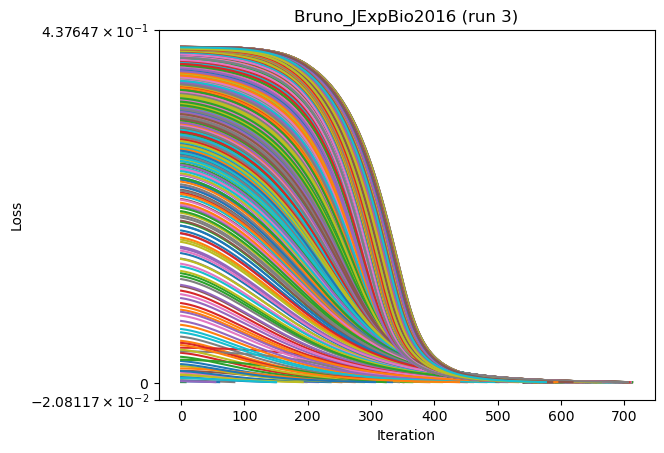

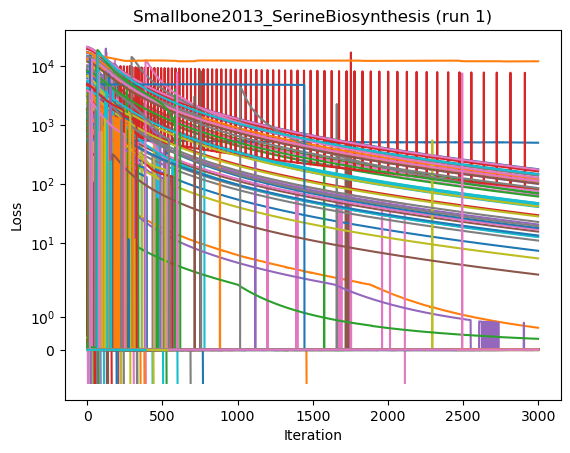

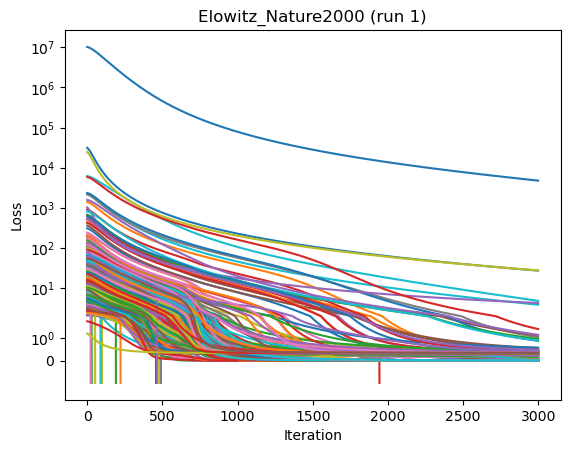

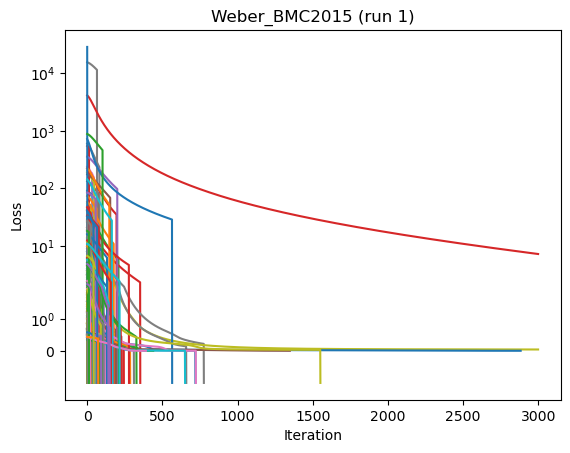

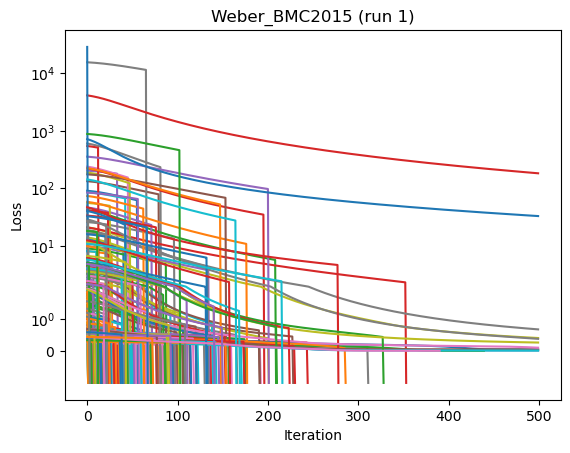

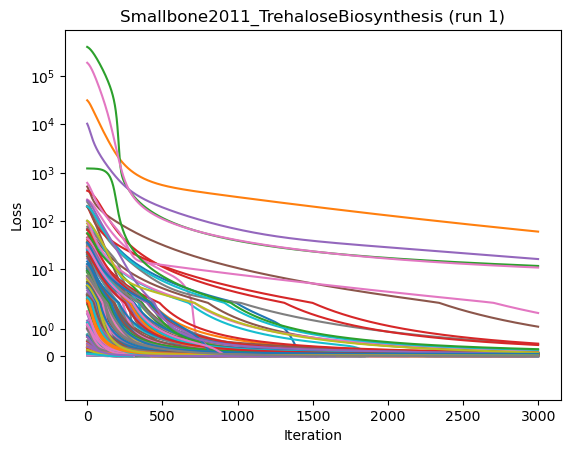

In [414]:
model_name="Bruno_JExpBio2016"
results_dir="results/"+model_name+"/"
file_list=os.listdir(results_dir)
loss_dfs,params_dfs,norms_dfs=retrieve_convergence_results(file_list)



plt.plot(loss_dfs['Bruno_JExpBio2016_losses_id_lhs_N=1000run_1_log_update.csv'])
plt.title(model_name+" (run 3)")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.yscale("symlog")
plt.show()

model_name="Smallbone2013_SerineBiosynthesis"
results_dir="results/"+model_name+"/"
file_list=os.listdir(results_dir)
loss_dfs,params_dfs,norms_dfs=retrieve_convergence_results(file_list)



plt.plot(loss_dfs['Smallbone2013_SerineBiosynthesis_losses_id_lhs_N=1000run_1_log_update.csv'])
plt.title(model_name+" (run 1)")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.yscale("symlog")
plt.show()

model_name="Elowitz_Nature2000"
results_dir="results/"+model_name+"/"
file_list=os.listdir(results_dir)
loss_dfs,params_dfs,norms_dfs=retrieve_convergence_results(file_list)



plt.plot(loss_dfs['Elowitz_Nature2000_losses_id_lhs_N=1000run_1_log_update.csv'])
plt.title(model_name+" (run 1)")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.yscale("symlog")
plt.show()

model_name="Weber_BMC2015"
results_dir="results/"+model_name+"/"
file_list=os.listdir(results_dir)
loss_dfs,params_dfs,norms_dfs=retrieve_convergence_results(file_list)



plt.plot(loss_dfs['Weber_BMC2015_losses_id_lhs_N=1000run_2_log_update.csv'])
plt.title(model_name+" (run 1)")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.yscale("symlog")
plt.show()



plt.plot(loss_dfs['Weber_BMC2015_losses_id_lhs_N=1000run_2_log_update.csv'].iloc[0:500,])
plt.title(model_name+" (run 1)")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.yscale("symlog")
plt.show()



model_name="Smallbone2011_TrehaloseBiosynthesis"
results_dir="results/"+model_name+"/"
file_list=os.listdir(results_dir)
loss_dfs,params_dfs,norms_dfs=retrieve_convergence_results(file_list)



plt.plot(loss_dfs['Smallbone2011_TrehaloseBiosynthesis_losses_id_lhs_N=1000run_3_log_update.csv'])
plt.title(model_name+" (run 1)")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.yscale("symlog")
plt.show()


In [413]:
loss_dfs

{'Smallbone2011_TrehaloseBiosynthesis_losses_id_lhs_N=1000run_3_log_update.csv':         0    1         2    3    4    5    6    7    8    9  ...  990  991  \
 0    -1.0 -1.0  0.808232 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  ... -1.0 -1.0   
 1     NaN  NaN  0.803589  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
 2     NaN  NaN  0.798738  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
 3     NaN  NaN  0.793684  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
 4     NaN  NaN  0.788428  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
 ...   ...  ...       ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
 2995  NaN  NaN  0.061992  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
 2996  NaN  NaN  0.061959  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
 2997  NaN  NaN  0.061926  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
 2998  NaN  NaN  0.061893  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
 2999  NaN  NaN  0.061860  NaN  NaN  NaN  NaN  NaN 

In [396]:
loss_dfs

{'Smallbone2013_SerineBiosynthesis_losses_id_lhs_N=1000run_2_log_update.csv':              0         1         2         3         4         5           6  \
 0     0.009857  0.009954  0.009956  0.009894  0.009902  0.009958    0.009970   
 1     0.009856  0.009954  0.009956  0.009894  0.009902  0.009957    0.009970   
 2     0.009856  0.009954  0.009956  0.009894  0.009901  0.009957    0.009970   
 3     0.009855  0.009954  0.009956  0.009893  0.009901  0.009957    0.009970   
 4     0.009855  0.009954  0.009956  0.009893  0.009901  0.009957    0.009970   
 ...        ...       ...       ...       ...       ...       ...         ...   
 2995       NaN       NaN  0.007363       NaN       NaN  0.009954  186.887575   
 2996       NaN       NaN  0.007363       NaN       NaN  0.009954  186.741393   
 2997       NaN       NaN  0.007363       NaN       NaN  0.009954  186.595363   
 2998       NaN       NaN  0.007363       NaN       NaN  0.009954  186.449485   
 2999       NaN       NaN  0.007